In [1]:
from classes.market_analysis.SP500Analysis import SP500Analysis
from classes.database.SP500Database import SP500Database
from config import db_path
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [2]:
sp500_database = SP500Database()
sp500_database.connect_existing_database(db_path / "sp500.sqlite")
market_analysis = SP500Analysis(sp500_database)
sefi = market_analysis.sefi(ma_column="MA50")
adr = market_analysis.adr_analysis()

In [3]:
df = market_analysis.sp500

In [4]:
def get_signal(sefi, rsi, bollinger, close):
    return (sefi > 65) and (rsi < 35) and (close < bollinger)

In [5]:
df['Signal'] = np.vectorize(get_signal)(df['SEFI'], df['RSI'], df['BB_lower'], df['Close'])

In [7]:
from backtester.Backtester import Backtester

backtest = Backtester(df[df['Signal']].index, df, limit={"colname": "Cum_change", "func": lambda x: x >= 2})
backtest.evaluate_strategy()
backtest.pretty_print_results()

Total Entries: 10

	Returns: [2.6045525 2.3345976 3.523372  3.6297061 2.5054393 2.6192374 2.414928
 3.9123976 2.3872263 2.2045822]
	Max: 3.912397623062134
	Min: 2.2045822143554688
	Mean: 2.8136038780212402
	Std: 0.5911583304405212
	Total: 28.13603973388672
	Entries: 10
	Mean_holding_time: 4.2
	Max_holding_time: 7
	Min_holding_time: 2


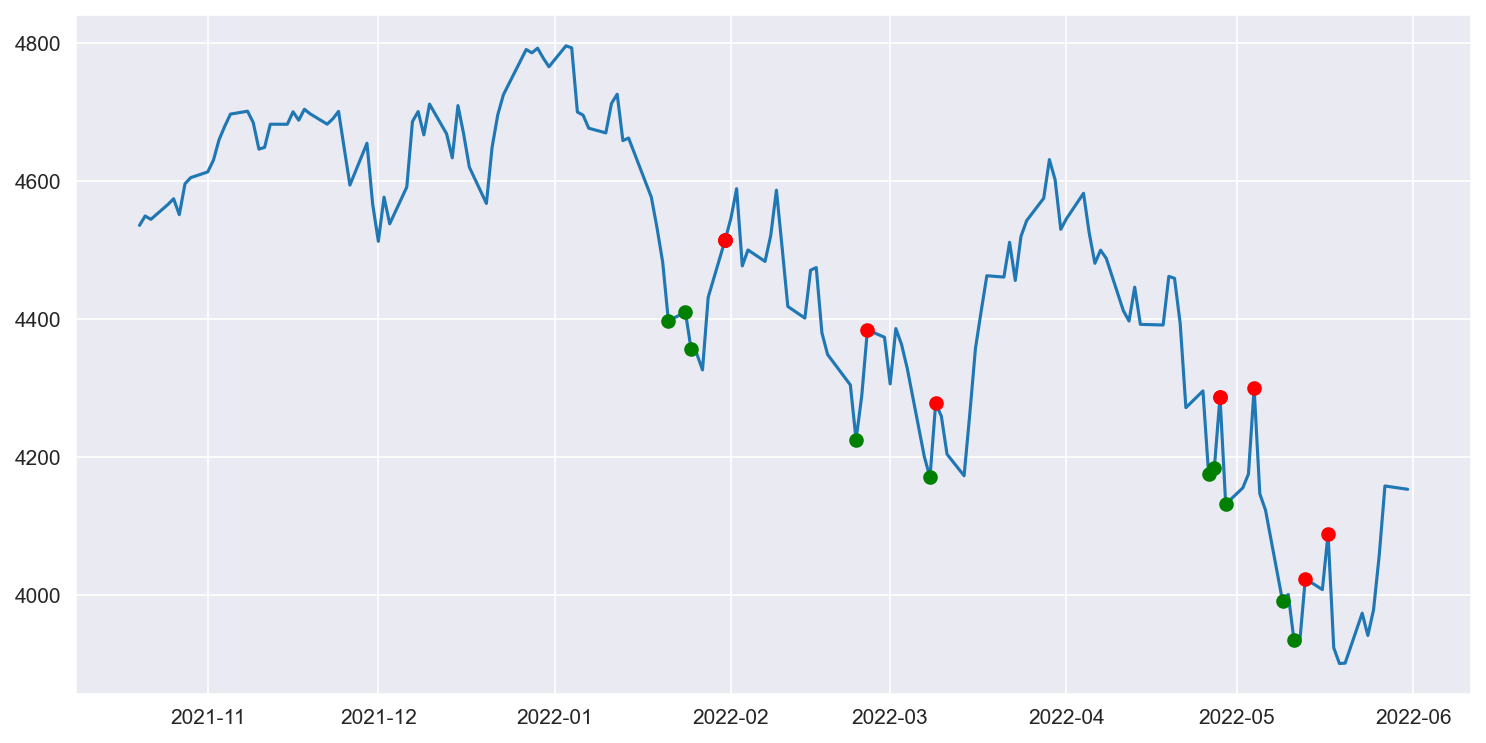

In [9]:
plt.figure(figsize=(12, 6), dpi=150)
plt.plot(df.index, df['Close'])
for entry in df[df['Signal']].index:
    plt.plot(entry, df['Close'].loc[entry], marker='o', c='g')
for sell in backtest.sell_points:
    plt.plot(sell, df['Close'].loc[sell], marker='o', c='r')
# for sefi_val in df[df['SEFI'] < 35].index:
#     plt.plot(sefi_val, df['Close'].loc[sefi_val], marker='o', c='magenta', alpha=.2)

In [10]:
backtest.evaluate_strategy()

In [9]:
from classes.strategies.TickerStrategy import TickerStrategy

np.vectorize(TickerStrategy.good_sefi_oversold)(df['SEFI'], df["RSI"], df['BB_lower'], df['Close'])[-1]

False